<a href="https://colab.research.google.com/github/Gokhu18/Movielens_Project/blob/master/Movielens_Project_Day_5_Datas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Project: Movielens Dataset Analysis

- To perform the analysis using the Exploratory Data Analysis technique. 
- machine learning to predict the survivors of the tragedy. 

#### Scope of the Project:

##### Step 1:

- Data Acquisition of the Movielens Dataset (users, rating, movies)

##### Step 2:

To Perform the Exploratory Data Analysis (EDA) for the users dataset

- Visualize user age distribution
- Visualize overall rating by users
- Find and visualize the user rating of the movie “Toy Story”
- Find and visualize the viewership of the movie “Toy Story” by age group
- Find and visualize the top 25 movies by viewership rating
- Find the rating for a particular user of user id = 2696
- Visualize the rating data by user of user id = 2696

##### Step 3 :

To Perform machine learning on first 500 extracted records
- Features (MovieID, Age,Occupation)
- Label (Rating)

##### Step 4:

To create train and test data set and perform the following:
- Create a histogram for movie, age, and occupation

In [0]:
# Importing the Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Step 1: Data Acquisition

In [0]:
movies = pd.read_csv('drive/Colab Notebooks/movies.dat', sep = '::', header = None, names = ['MovieID', 'Title', 'Genres'], engine = 'python')
ratings = pd.read_csv('drive/Colab Notebooks/ratings.dat', sep = '::', header = None, names = ['UserID','MovieID', 'Rating', 'Timestamp'], engine='python')
users = pd.read_csv('drive/Colab Notebooks/users.dat', sep = '::', header = None, names = ['UserID','Gender','Age','Occupation','Zip-code'], engine = 'python')

#### Analysis the Datasets / Preparing Data Profile

In [0]:
movies.describe()

,MovieID
count,3883.000000
mean,1986.049446
std,1146.778349
min,1.000000
25%,982.500000
50%,2010.000000
75%,2980.500000
max,3952.000000


In [0]:
movies.shape

(3883, 3)

In [0]:
movies.isna().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [0]:
movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [0]:
users.shape

(6040, 5)

In [0]:
users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [0]:
users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [0]:
users.describe()

,UserID,Age,Occupation
count,6040.000000,6040.000000,6040.000000
mean,3020.500000,30.639238,8.146854
std,1743.742145,12.895962,6.329511
min,1.000000,1.000000,0.000000
25%,1510.750000,25.000000,3.000000
50%,3020.500000,25.000000,7.000000
75%,4530.250000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [0]:
ratings.shape

(1000209, 4)

In [0]:
ratings.isna().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [0]:
ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [0]:
ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.024512e+03,1.865540e+03,3.581564e+00,9.722437e+08
std,1.728413e+03,1.096041e+03,1.117102e+00,1.215256e+07
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08
25%,1.506000e+03,1.030000e+03,3.000000e+00,9.653026e+08
50%,3.070000e+03,1.835000e+03,4.000000e+00,9.730180e+08
75%,4.476000e+03,2.770000e+03,4.000000e+00,9.752209e+08
max,6.040000e+03,3.952000e+03,5.000000e+00,1.046455e+09


#### Merge the Datasets

In [0]:
movies.head(2)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [0]:
users.head(2)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072


In [0]:
ratings.head(2)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109


In [0]:
user_data = pd.merge(users,ratings, on = 'UserID',how = 'left')
user_data.head(2)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109


In [0]:
# Merge all the Datasets to create MAster_Data
Master_Data = pd.merge(user_data, movies,on = 'MovieID',how = 'left')

In [0]:
Master_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
UserID        1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Zip-code      1000209 non-null object
MovieID       1000209 non-null int64
Rating        1000209 non-null int64
Timestamp     1000209 non-null int64
Title         1000209 non-null object
Genres        1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


In [0]:
Master_Data.head(2)

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical


#### Step 2: 

#### Exploratory Data Analysis (EDA) for the users dataset

##### 1. Visualize user age distribution

In [0]:
users.head(2)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072


In [0]:
users['Age'].unique()

array([ 1, 56, 25, 45, 50, 35, 18])

In [0]:
users.groupby('Age')['UserID'].count()

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
Name: UserID, dtype: int64

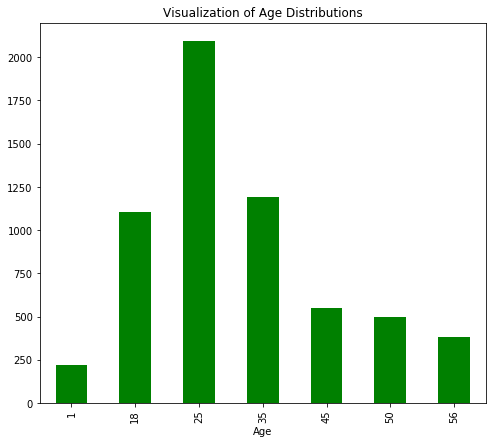

In [0]:
users.groupby('Age')['UserID'].count().plot(kind = 'bar', color = 'green', x = 'Age', y = 'Number of Users', title = 'Visualization of Age Distributions',figsize = (8,7))

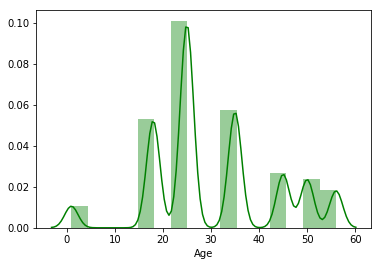

In [0]:
sns.distplot(users['Age'], color = 'g', bins = 16)

#### 2. Visualize overall rating by users

In [0]:
Master_Data.groupby('Rating')['UserID'].count()

Rating
1     56174
2    107557
3    261197
4    348971
5    226310
Name: UserID, dtype: int64

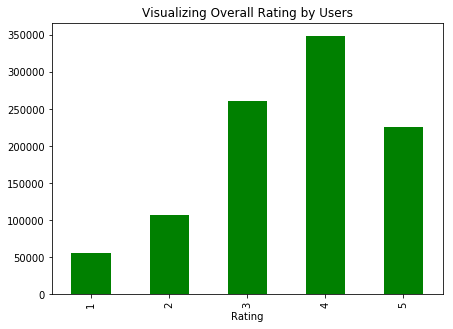

In [0]:
userRating = Master_Data.groupby('Rating')['UserID'].count()
userRating.plot(kind ='bar', color = 'g', x = 'Rating', y = 'Number of Users', title = 'Visualizing Overall Rating by Users', figsize = (7,5))

#### 3. Find and visualize the user rating of the movie “Toy Story”

In [0]:
Master_Data[Master_Data.Title == 'Toy Story (1995)'].shape

(2077, 10)

In [0]:
Master_Data[Master_Data.Title == 'Toy Story (1995)'].groupby('Rating')['UserID'].count()

Rating
1     16
2     61
3    345
4    835
5    820
Name: UserID, dtype: int64

In [0]:
toystory_rating = Master_Data[Master_Data.Title == 'Toy Story (1995)'].groupby('Rating')['UserID'].count()

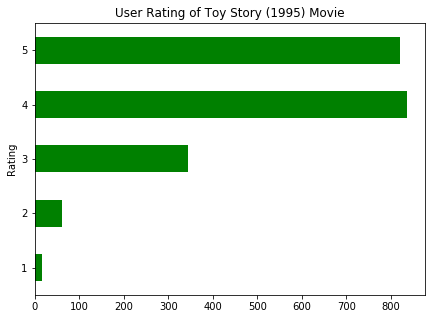

In [0]:
toystory_rating.plot(kind ='barh', color = 'g', x = 'Rating', y = 'Number of Users', title = 'User Rating of Toy Story (1995) Movie', figsize = (7,5))

#### 4. Find and visualize the viewership of the movie “Toy Story” by age group

In [0]:
Master_Data[Master_Data.Title == 'Toy Story (1995)'].groupby('Age')['UserID'].count()

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: UserID, dtype: int64

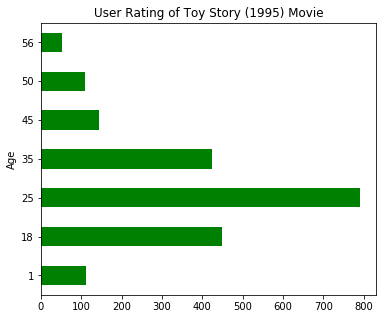

In [0]:
Master_Data[Master_Data.Title == 'Toy Story (1995)'].groupby('Age')['UserID'].count().plot(kind ='barh', color = 'g', x = 'Rating', y = 'Number of Users', title = 'User Rating of Toy Story (1995) Movie', figsize = (6,5))

#### 5. Find and visualize the top 25 movies by viewership rating

In [0]:
Master_Data.groupby('MovieID')['Rating'].count()

MovieID
1       2077
2        701
3        478
4        170
5        296
6        940
7        458
8         68
9        102
10       888
11      1033
12       160
13        99
14       153
15       146
16       682
17       835
18       157
19       389
20       160
21      1356
22       378
23       126
24       624
25       980
26       100
27        61
28       179
29       403
30        74
        ... 
3923     104
3924      26
3925     124
3926     180
3927     348
3928     206
3929     147
3930     223
3931      27
3932     232
3933      16
3934      28
3935      23
3936     112
3937     135
3938      27
3939      26
3940      15
3941      22
3942      28
3943      96
3944       9
3945      43
3946     100
3947      55
3948     862
3949     304
3950      54
3951      40
3952     388
Name: Rating, Length: 3706, dtype: int64

In [0]:
Master_Data.groupby('MovieID')['Rating'].count().sort_values(ascending = False)[:25]

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: Rating, dtype: int64

In [0]:
Master_Data.groupby('MovieID')['Rating'].count().nlargest(25)

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
1580    2538
1198    2514
608     2513
2762    2459
110     2443
2396    2369
1197    2318
527     2304
1617    2288
1265    2278
1097    2269
2628    2250
2997    2241
318     2227
858     2223
Name: Rating, dtype: int64

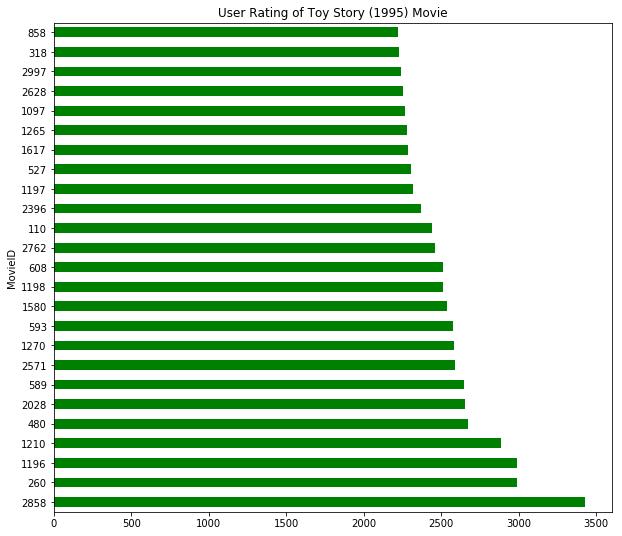

In [0]:
Master_Data.groupby('MovieID')['Rating'].count().sort_values(ascending = False)[:25].plot(kind ='barh', color = 'g', x = 'Rating', y = 'Number of Users', title = 'User Rating of Toy Story (1995) Movie', figsize = (10,9))

#### 5. Find the rating for a particular user of user id = 2696

In [0]:
Master_Data[Master_Data.UserID == 2696].groupby('MovieID')['Rating'].count()

MovieID
350     1
800     1
1092    1
1097    1
1258    1
1270    1
1589    1
1617    1
1625    1
1644    1
1645    1
1711    1
1783    1
1805    1
1892    1
2338    1
2389    1
2713    1
3176    1
3386    1
Name: Rating, dtype: int64

In [0]:
Master_Data[Master_Data.UserID == 2696].groupby('Rating')['MovieID'].count()

Rating
1     2
2     3
3     3
4    11
5     1
Name: MovieID, dtype: int64

#### 6. Visualize the rating data by user of user id = 2696

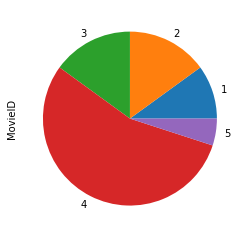

In [0]:
Master_Data[Master_Data.UserID == 2696].groupby('Rating')['MovieID'].count().plot(kind = 'pie')

#### Step 3 : Perform machine learning on first 500 extracted records

In [0]:
ml_Data = Master_Data.head(500)
ml_Data

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy
5,1,F,1,10,48067,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance
6,1,F,1,10,48067,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama
7,1,F,1,10,48067,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama
8,1,F,1,10,48067,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical
9,1,F,1,10,48067,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical


In [0]:
ml_Data.shape

(500, 10)

In [0]:
ml_Data.describe()

,UserID,Age,Occupation,MovieID,Rating,Timestamp
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,3.652000,33.694000,15.796000,1778.060000,3.592000,9.782851e+08
std,1.659036,17.630372,4.284285,1067.403452,1.088073,9.241357e+04
min,1.000000,1.000000,7.000000,1.000000,1.000000,9.782361e+08
25%,2.000000,25.000000,15.000000,991.000000,3.000000,9.782445e+08
50%,4.000000,25.000000,16.000000,1683.500000,4.000000,9.782940e+08
75%,5.000000,56.000000,20.000000,2716.250000,4.000000,9.782992e+08
max,6.000000,56.000000,20.000000,3893.000000,5.000000,9.788244e+08


In [0]:
ml_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
UserID        500 non-null int64
Gender        500 non-null object
Age           500 non-null int64
Occupation    500 non-null int64
Zip-code      500 non-null object
MovieID       500 non-null int64
Rating        500 non-null int64
Timestamp     500 non-null int64
Title         500 non-null object
Genres        500 non-null object
dtypes: int64(6), object(4)
memory usage: 43.0+ KB


- Features (MovieID, Age,Occupation)
- Label (Rating)

#### Label (Rating) is an Ordinal so we should use Multiclass Classification


In [0]:
ml_Data['Age'].unique()

array([ 1, 56, 25, 45, 50])

In [0]:
ml_Data['Occupation'].unique()

array([10, 16, 15,  7, 20,  9])

In [0]:
ml_Data.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp,Title,Genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy


In [0]:
f = ml_Data.iloc[:,[5,2,3]]
f.head(2)

,MovieID,Age,Occupation
0,1193,1,10
1,661,1,10


In [0]:
l = ml_Data.iloc[:,6]
l.head(2)

0    5
1    3
Name: Rating, dtype: int64

#### For classification use-case your label must be a 1-D array

In [0]:
features = f.values
label = l.values

In [69]:
#Training Score 0.3925 Testing Score 0.52 for Random State 366 and n_neighbors 52
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train,X_test,Y_train,Y_test = train_test_split(features,label,test_size=0.2, random_state=366 )
model = KNeighborsClassifier(n_neighbors = 52)
model.fit(X_train,Y_train)
training_score = model.score(X_train,Y_train)
testing_score = model.score(X_test,Y_test)
# Only Generalized model will be outputted
if testing_score > training_score:
    print("Training Score {} Testing Score {} ".format(training_score,testing_score))

Training Score 0.3925 Testing Score 0.52 


In [70]:
movieid = int(input("Enter the MovieID: "))
age = int(input("Enter the Age Group( 1, 56, 25, 45, 50):"))
occupation = int(input("Enter the Occupation group value (10, 16, 15,  7, 20,  9):"))

featureInput = np.array([[movieid,age,occupation]])
rating = model.predict(featureInput)
print("Rating of the Movie is: ", rating)

Enter the MovieID: 2858
Enter the Age Group( 1, 56, 25, 45, 50):25
Enter the Occupation group value (10, 16, 15,  7, 20,  9):10
Rating of the Movie is:  [4]


#### Thank you